## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-04-01 09:39:30.998614: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 09:39:32.595996: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-01 09:39:34.205767: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 20.0%
RAM Usage: 12.8%
Available RAM: 1.3T
Total RAM: 1.5T
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


None
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

In [ ]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='shared_transformer',
              feature_type=[{'transcriptome': None}],
              connectome_target='SC',
              binarize=None,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              gene_list='0.2',
              impute_strategy='mirror_interpolate',
              sort_genes='expression',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (390, 7380)
X_pca shape: (390, 27)
Y_sc shape: (390, 390)
Y_sc_spectralL shape: (390, 455)
Y_sc_spectralA shape: (390, 456)
Y_fc shape: (390, 390)
Coordinates shape: (390, 3)
Y shape (390, 390)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset
1
2
3
BEST CONFIG {'activation': 'none', 'learning_rate': 0.001, 'batch_size': 256, 'regularization': 'l2', 'lambda_reg': 0.1, 'shared_weights': True, 'input_dim': 14760, 'reduced_dim': 10, 'epochs': 150}
Number of learnable parameters in bilinear low rank model: 73800
Available GPUs: 1
GPU 0: Quadro RTX 8000 - Memory Allocated: 0.02 GB
Best val loss so far at epoch 1: 0.2175
Best val loss so far at epoch 2: 0.2172
Best val loss so far at epoch 3: 0.2170
Best val loss so far at epoch 

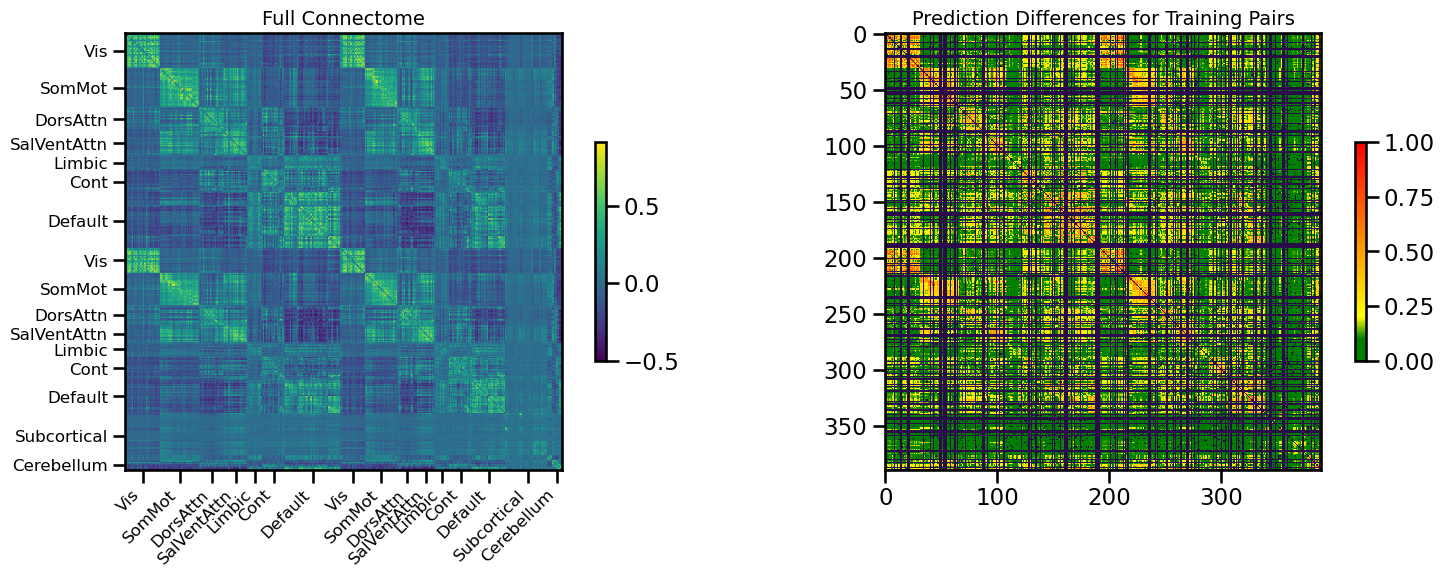

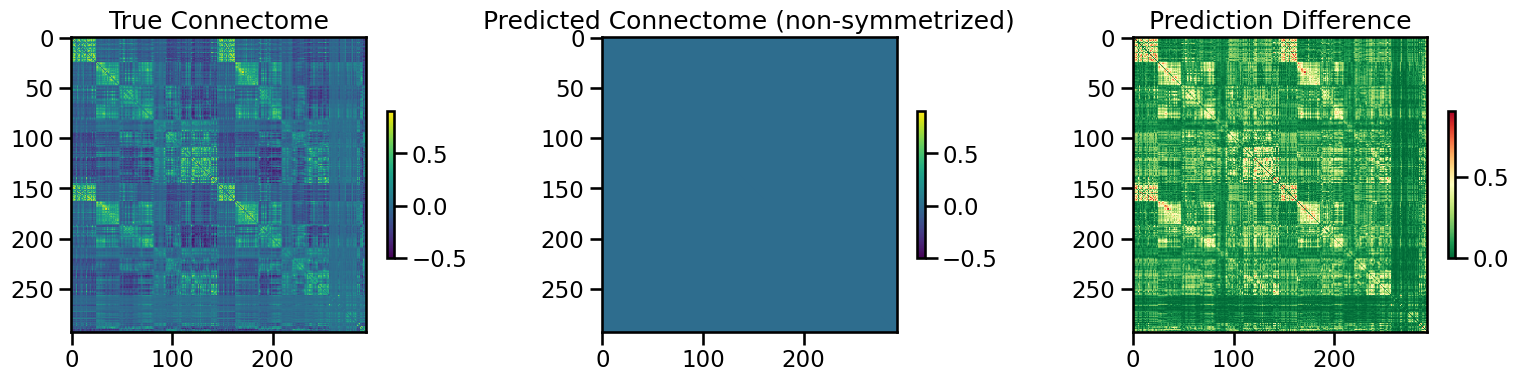

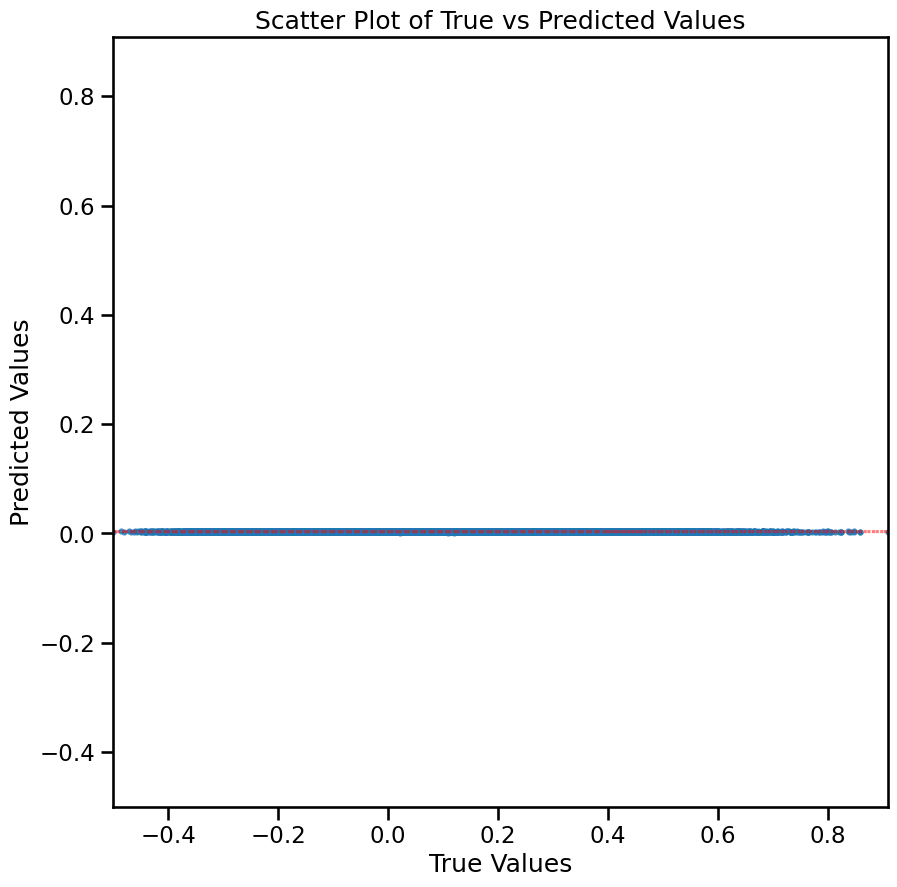

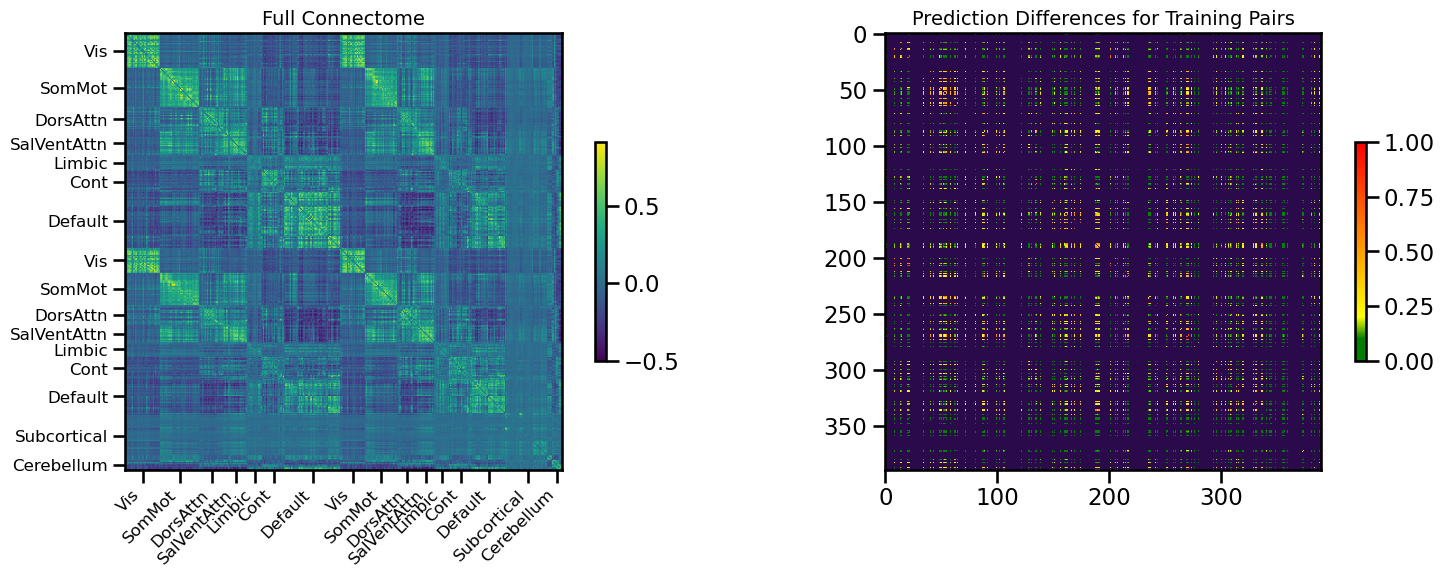

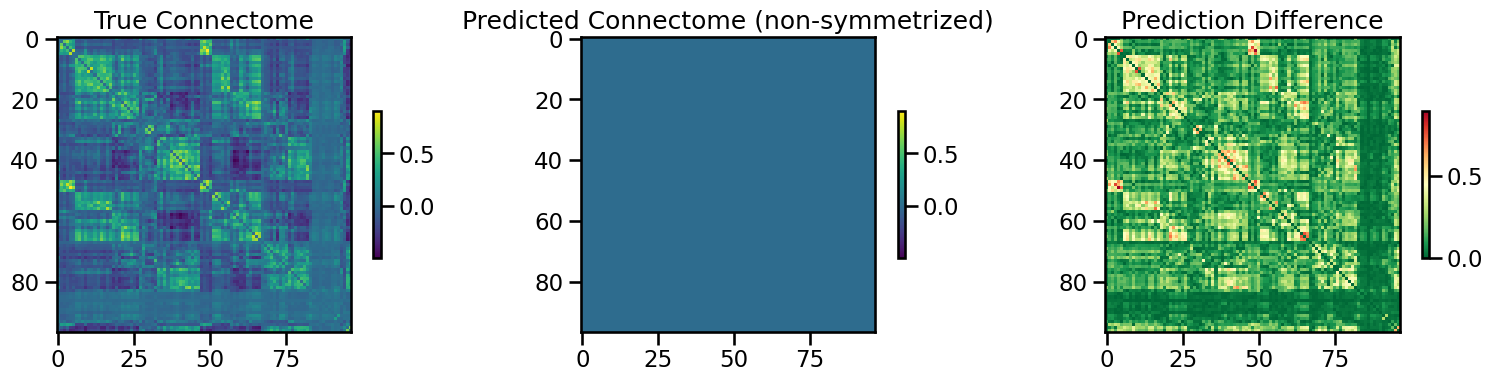

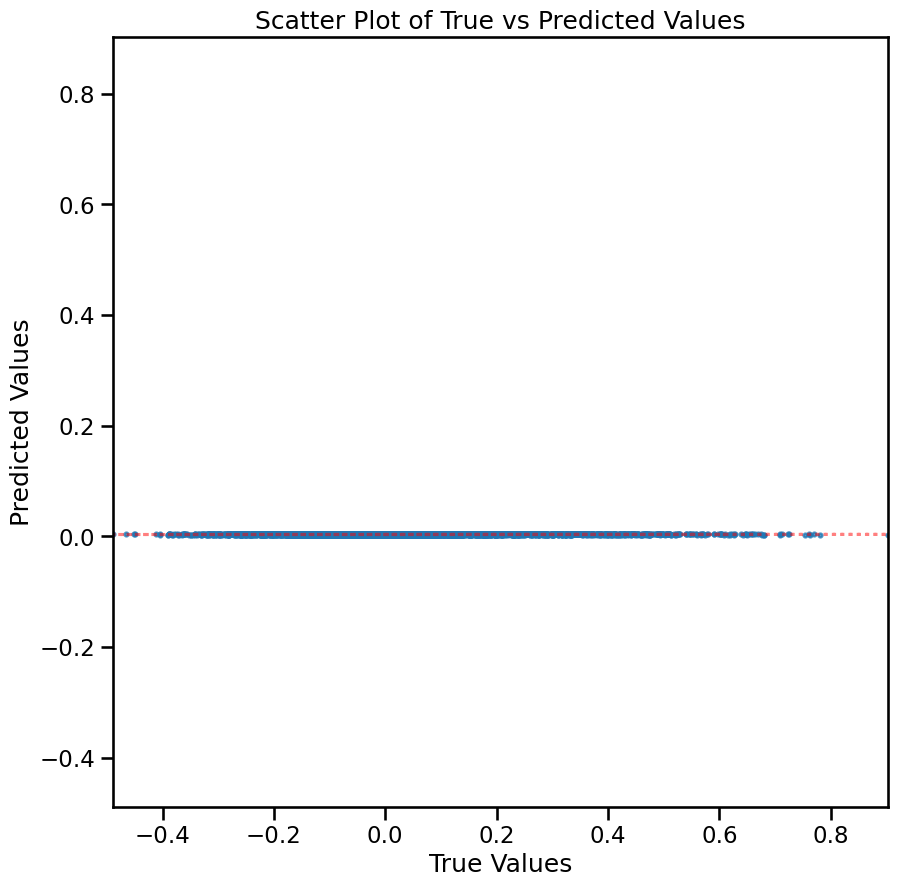


TRAIN METRICS: {'mse': 0.031825446, 'mae': 0.12868367, 'r2': -0.0052175600209452, 'pearson_corr': 0.026226563801414648, 'geodesic_distance': 87.84337326697977}
TEST METRICS: {'mse': 0.035715327, 'mae': 0.13896659, 'r2': -0.005229916771910537, 'pearson_corr': 0.06852141319644946, 'geodesic_distance': 49.57042439194381}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'activation': Identity(), 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 256, 'regularization': 'l2', 'lambda_reg': 0.1, 'shared_weights': True}
CPU Usage: 27.8%
RAM Usage: 20.2%
Available RAM: 300.8G
Total RAM: 377.1G
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


56788

In [50]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='bilinear_lowrank', # WORKS
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=None,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              gene_list='0.2',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

  warnings.warn(



Number of components for 95% variance PCA: 34
Number of 1s: 3362, Number of 0s: 9634, Class balance (1s): 0.259
Number of 1s: 3220, Number of 0s: 9776, Class balance (1s): 0.248
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  transcriptome_PCA
processing_type:  None
features ['transcriptome_PCA']
X generated... expanding to pairwise dataset
1
2
3
BEST CONFIG {'input_dim': 68, 'learning_rate': 0.002, 'batch_size': 324, 'regularization': 'l2', 'lambda_reg': 0.1, 'epochs': 300}
Number of learnable parameters in bilinear SCM layer: 1157
Available GPUs: 1
GPU 0: Quadro RTX 8000 - Memory Allocated: 0.02 GB
Best val loss so far at epoch 1: 801.0481
Best val loss so far at epoch 2: 614.5095
Best val loss so far at epoch 3: 467.1049
Best val loss so far at epoch 4: 378.1445
Epoch 5/300, Train Loss: 15.5912, Val Loss: 308.0556


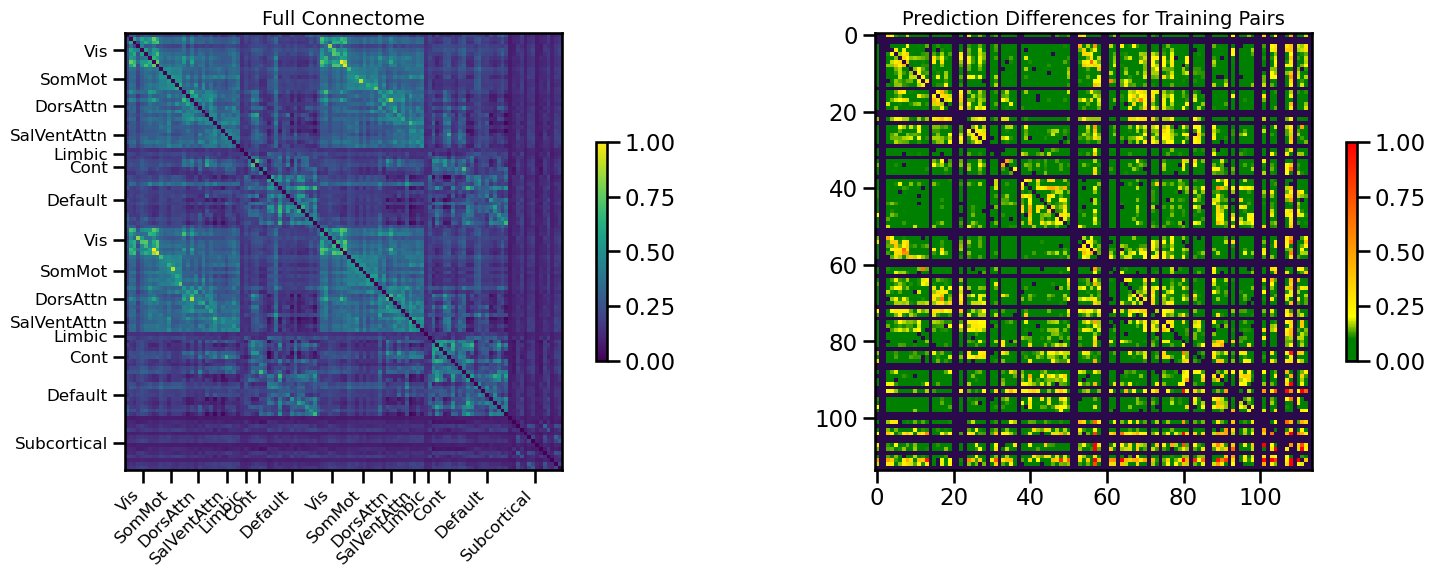

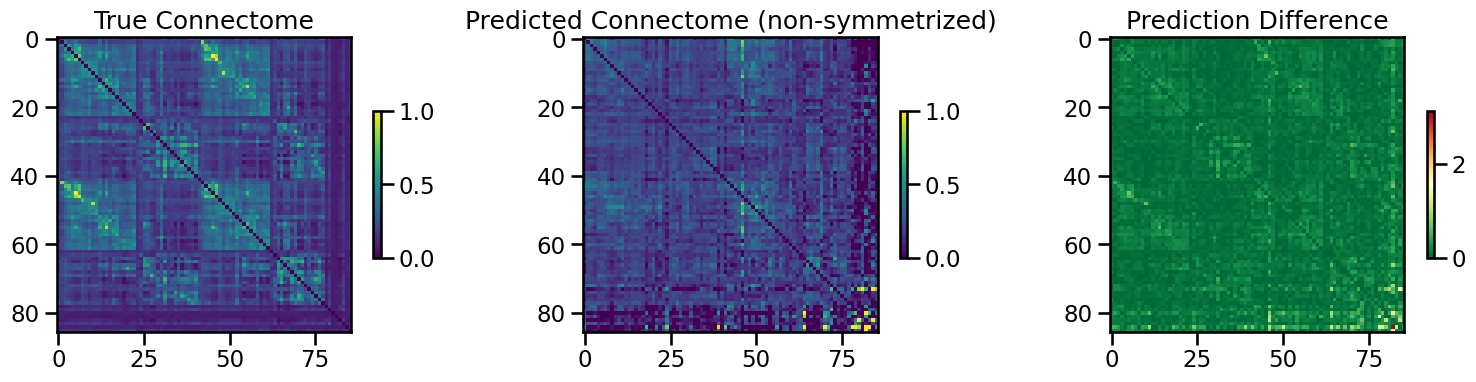

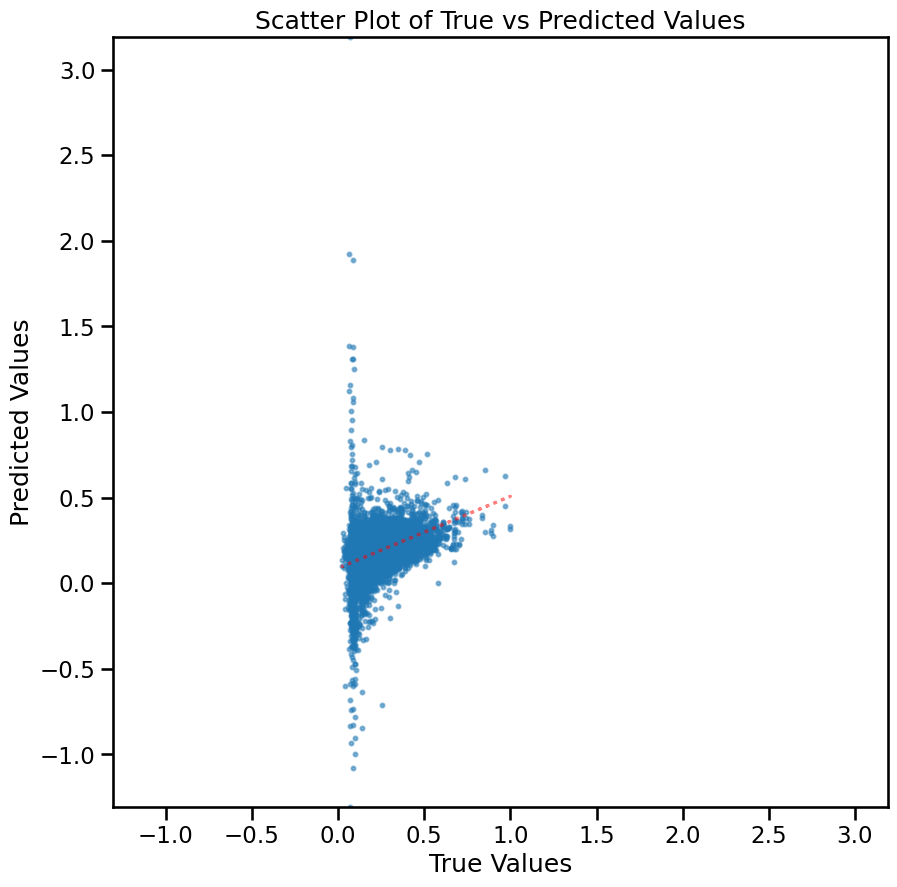

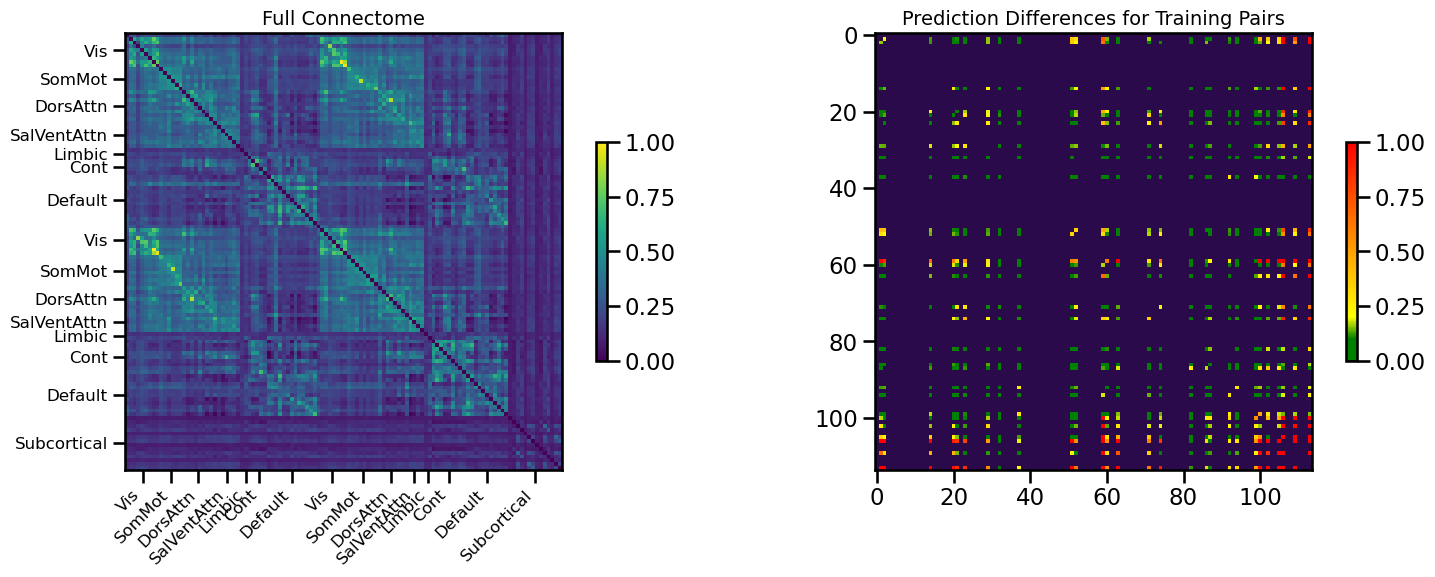

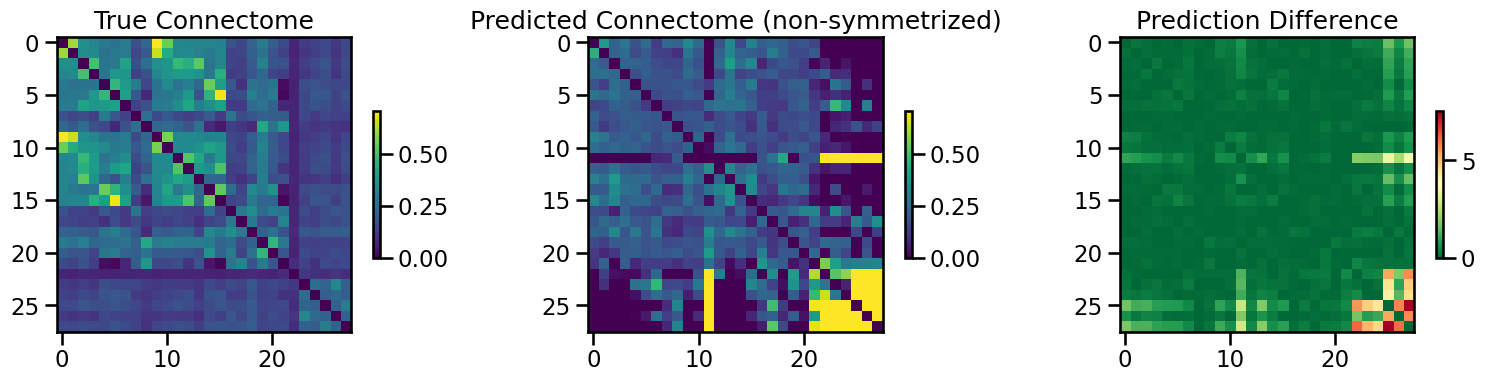

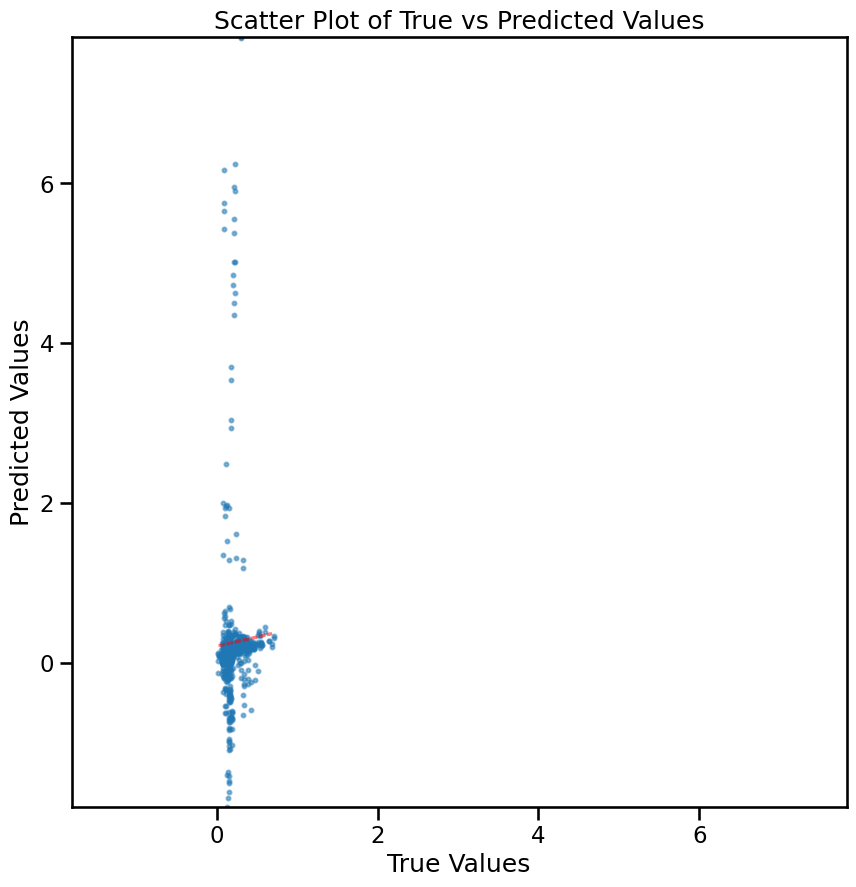


TRAIN METRICS: {'mse': 0.025533272, 'mae': 0.10783309, 'r2': -0.731638726845105, 'pearson_corr': 0.351536176559236, 'geodesic_distance': 12.556319968311195}
TEST METRICS: {'mse': 0.9190671, 'mae': 0.35708675, 'r2': -68.86915418679011, 'pearson_corr': 0.027621704998537604, 'geodesic_distance': 10.181106793848228}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'learning_rate': 0.002, 'epochs': 300, 'batch_size': 324, 'regularization': 'l2', 'lambda_reg': 0.1}
CPU Usage: 28.8%
RAM Usage: 18.2%
Available RAM: 308.4G
Total RAM: 377.1G
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


56125

In [51]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='bilinear_SCM', # WORKS
              feature_type=[{'transcriptome_PCA': None}],
              connectome_target='FC',
              binarize=None,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 34
Number of 1s: 3362, Number of 0s: 9634, Class balance (1s): 0.259
Number of 1s: 3220, Number of 0s: 9776, Class balance (1s): 0.248
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset
1
2
3
BEST CONFIG {'input_dim': 21520, 'encoder_output_dim': 24, 'deep_hidden_dims': [64, 32], 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0, 'regularization': 'l2', 'lambda_reg': 0.0001, 'batch_size': 128, 'epochs': 125}
Available GPUs: 1
GPU 0: Quadro RTX 8000 - Memory Allocated: 0.11 GB
Best val loss so far at epoch 1: 0.2845
Best val loss so far at epoch 2: 0.1384
Best val loss so far at epoch 4: 0.0366
Epoch 5/125, Train Loss: 0.1446, Val Loss: 0.0917
Epoch 10/125, T

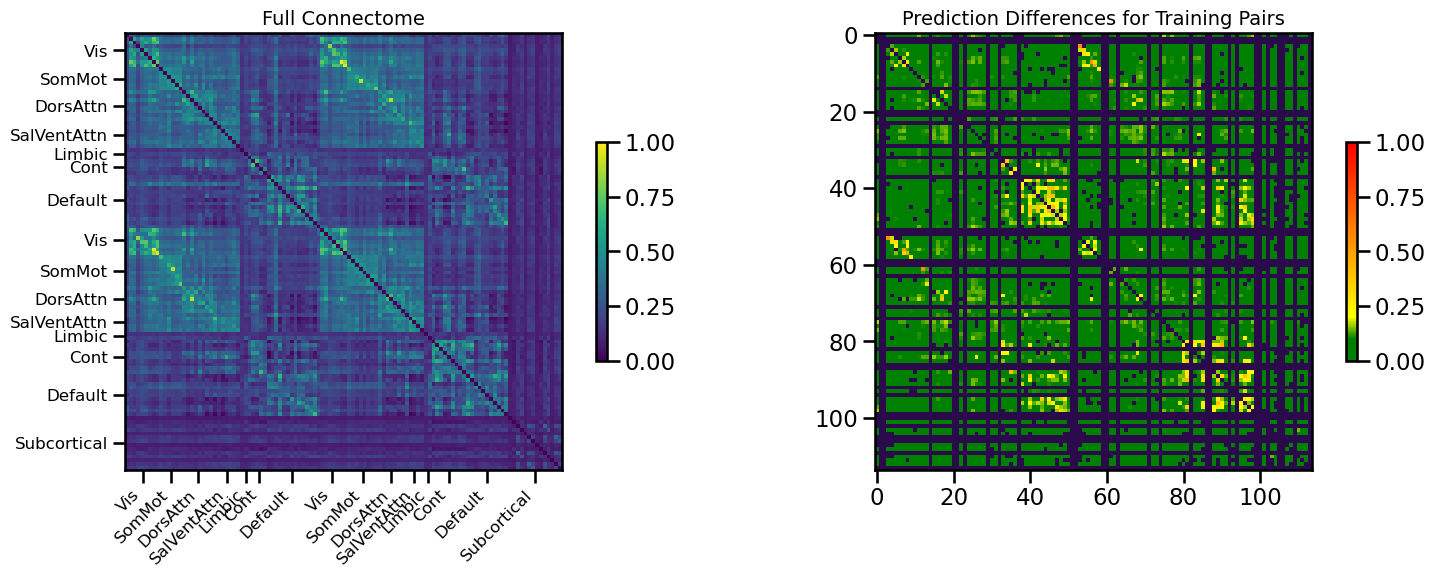

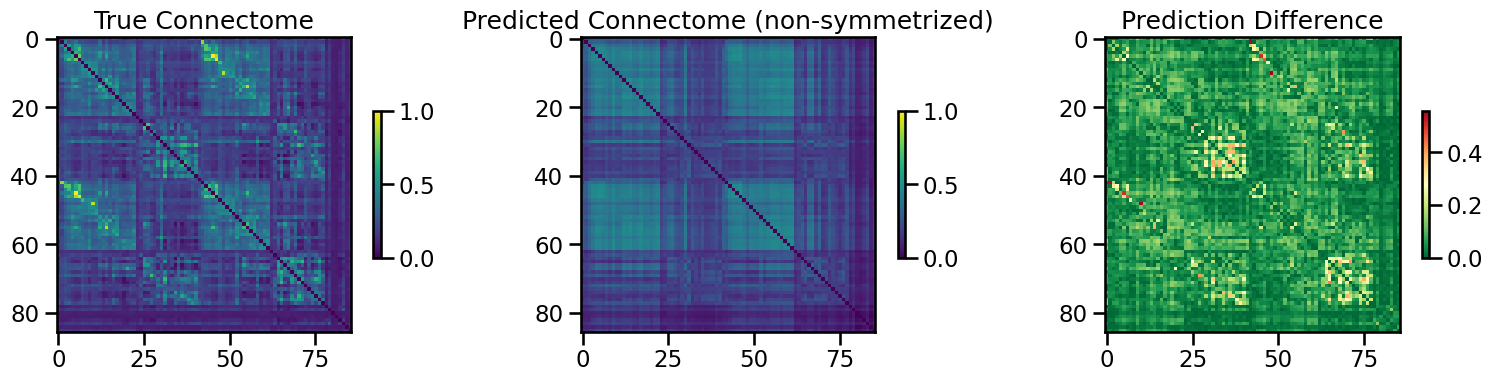

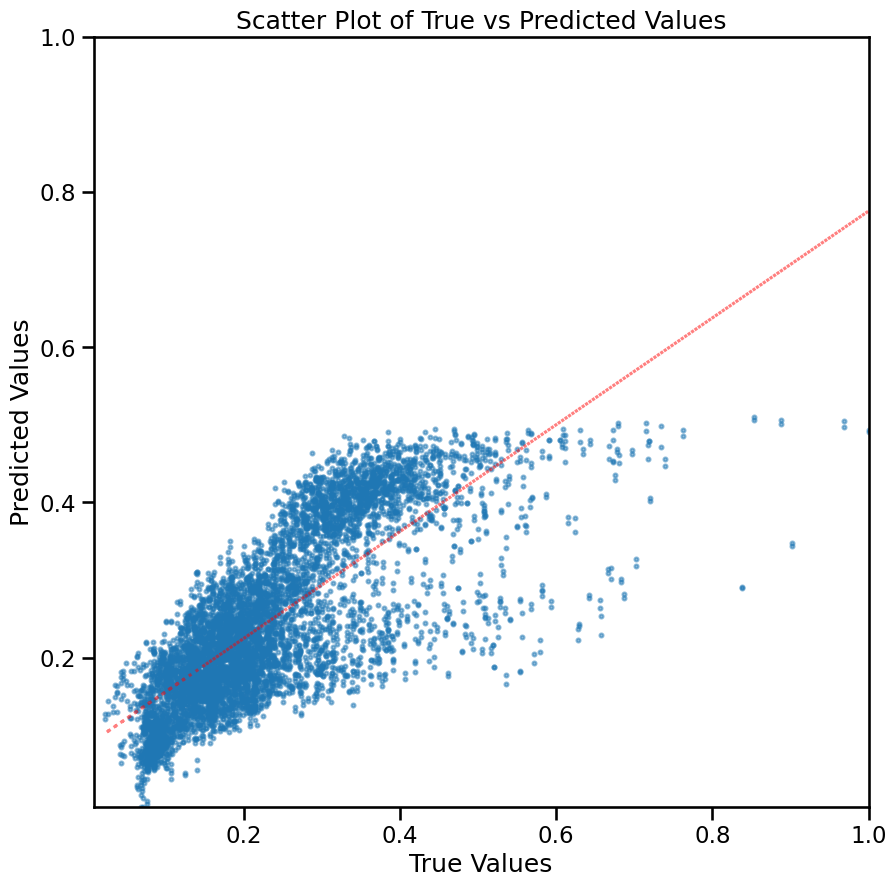

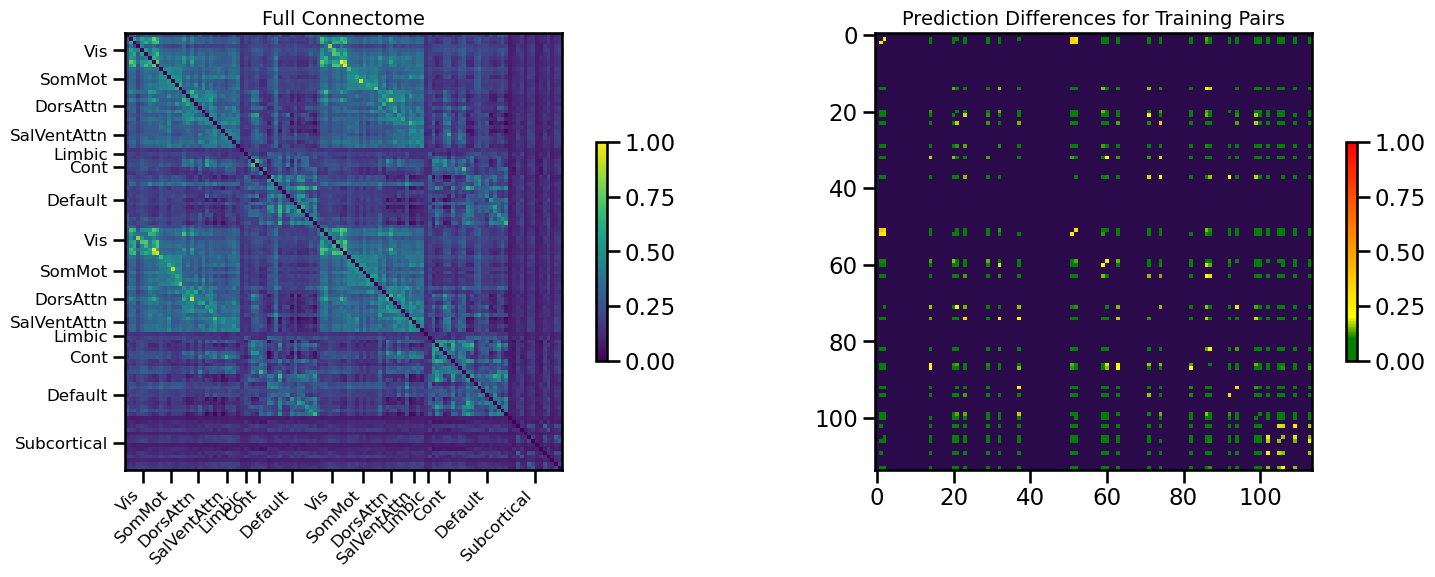

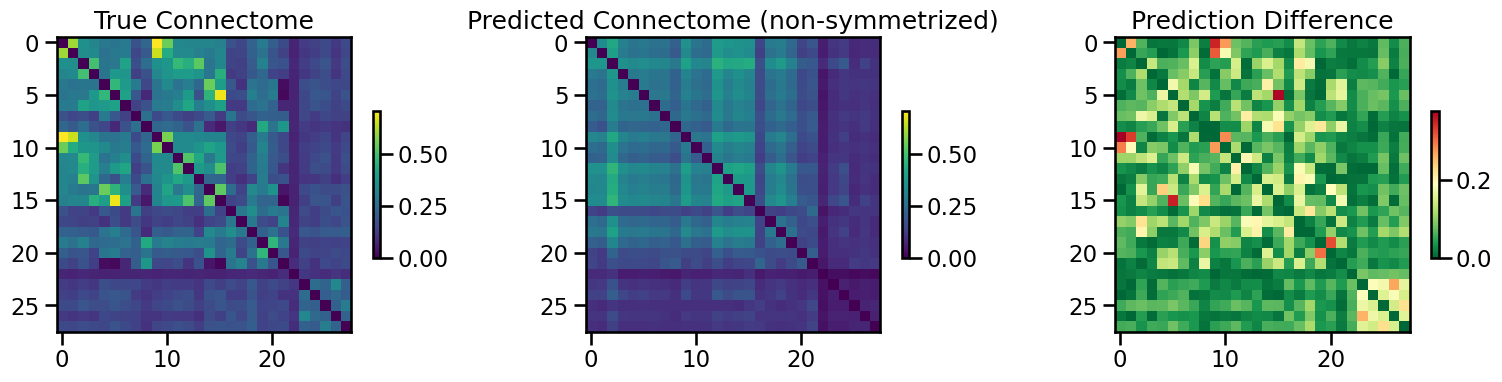

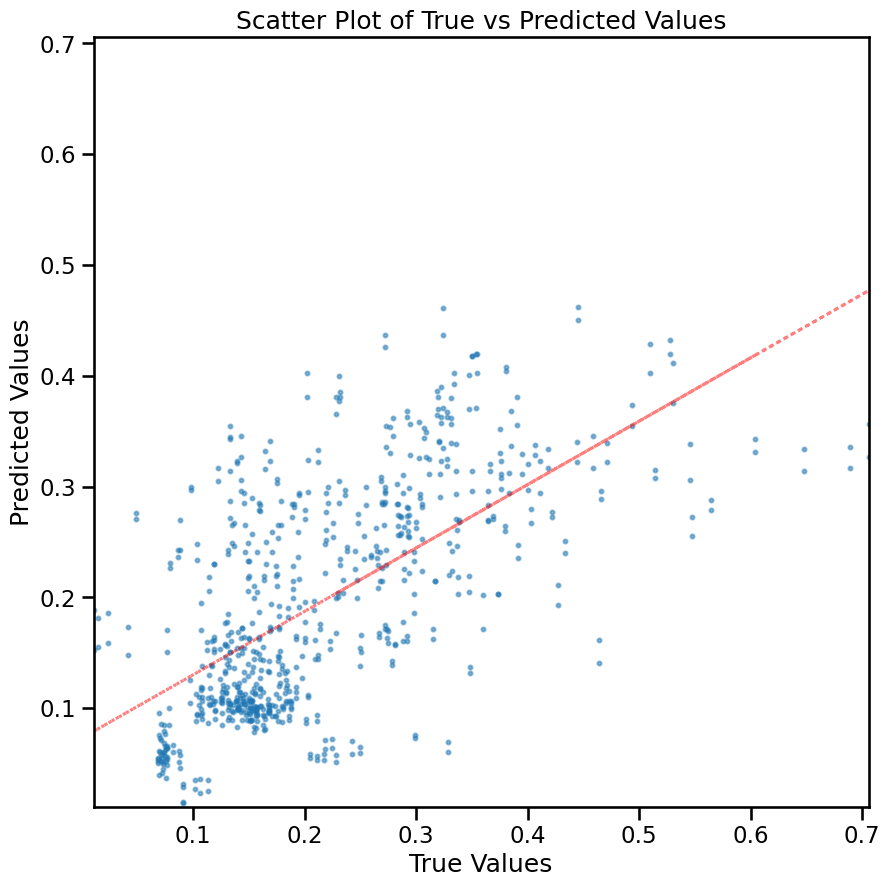


TRAIN METRICS: {'mse': 0.0066071665, 'mae': 0.060371693, 'r2': 0.5519091660550374, 'pearson_corr': 0.7650534117724407, 'geodesic_distance': 8.91925268981696}
TEST METRICS: {'mse': 0.008830112, 'mae': 0.06976047, 'r2': 0.3287187658706713, 'pearson_corr': 0.6456562078915821, 'geodesic_distance': 6.1164432946966505}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 21520, 'encoder_output_dim': 24, 'deep_hidden_dims': [64, 32], 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0, 'regularization': 'l2', 'lambda_reg': 0.0001, 'batch_size': 128, 'epochs': 125}
CPU Usage: 11.2%
RAM Usage: 16.9%
Available RAM: 313.3G
Total RAM: 377.1G
| ID | GPU | MEM |
------------------
|  0 |  0% | 12% |


3266

In [69]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='shared_linear_encoder', 
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=None,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 34
Number of 1s: 3362, Number of 0s: 9634, Class balance (1s): 0.259
Number of 1s: 3220, Number of 0s: 9776, Class balance (1s): 0.248
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset
1
2
3
BEST CONFIG {'input_dim': 21520, 'encoder_hidden_dim': 256, 'encoder_output_dim': 16, 'deep_hidden_dims': [32], 'use_bilinear': True, 'dropout_rate': 0.0, 'learning_rate': 0.0001, 'weight_decay': 0.0, 'lambda_reg': 0.0, 'batch_size': 128, 'epochs': 150}
Available GPUs: 1
GPU 0: Quadro RTX 8000 - Memory Allocated: 0.08 GB
Best val loss so far at epoch 1: 0.7939
Best val loss so far at epoch 2: 0.5699
Best val loss so far at epoch 3: 0.3453
Best val loss so far at epoch 4: 0.2462
Epoch

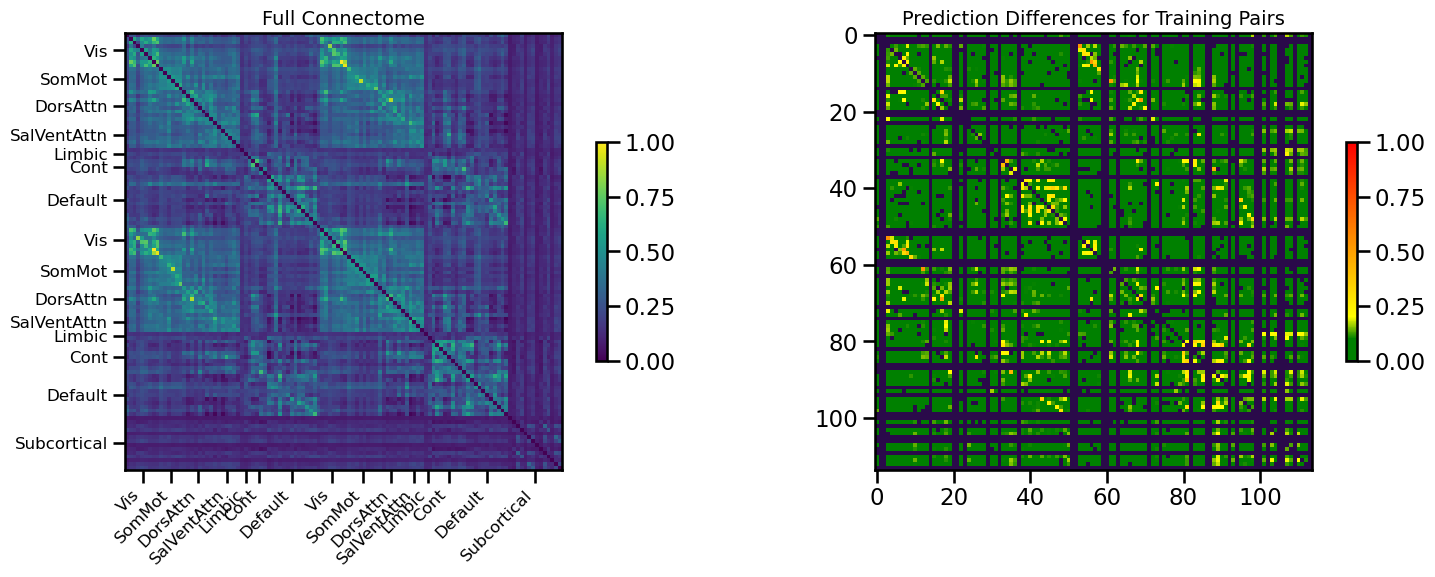

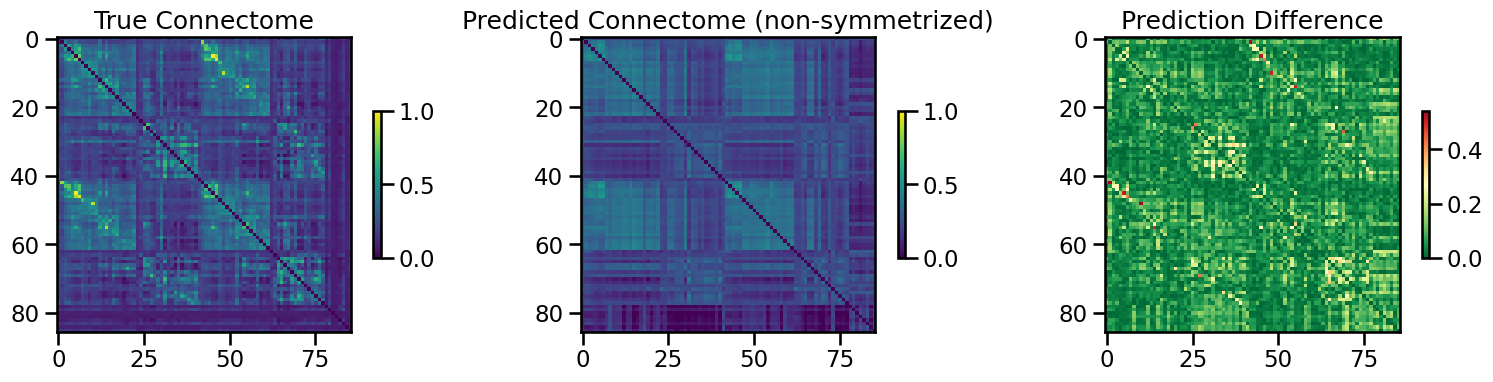

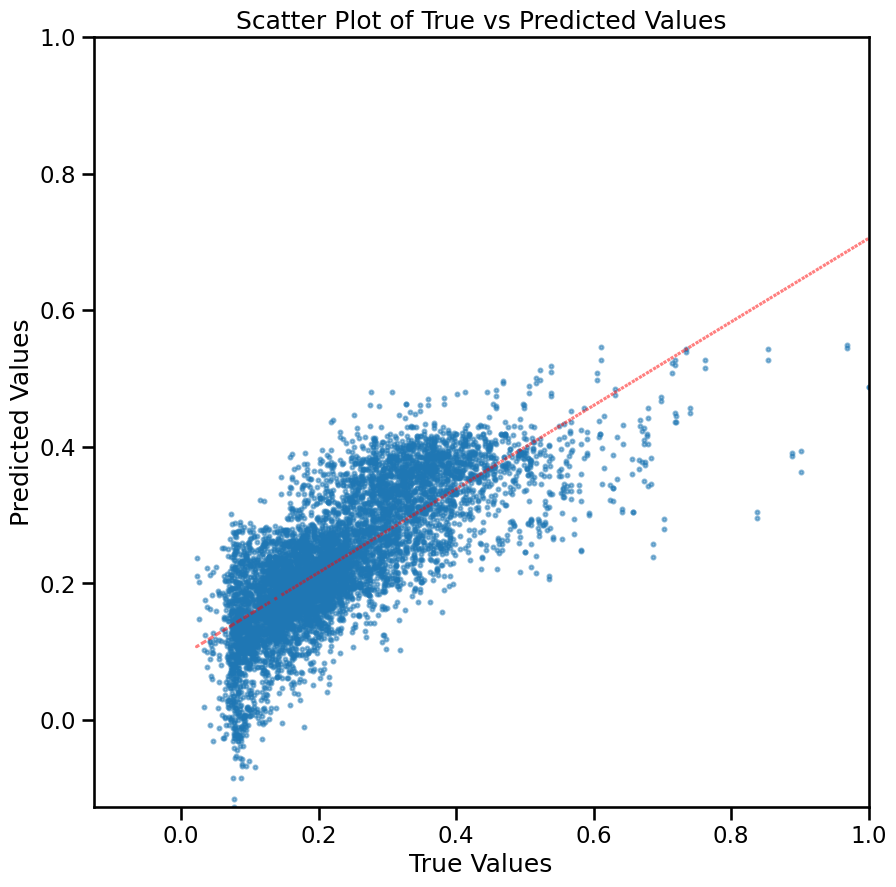

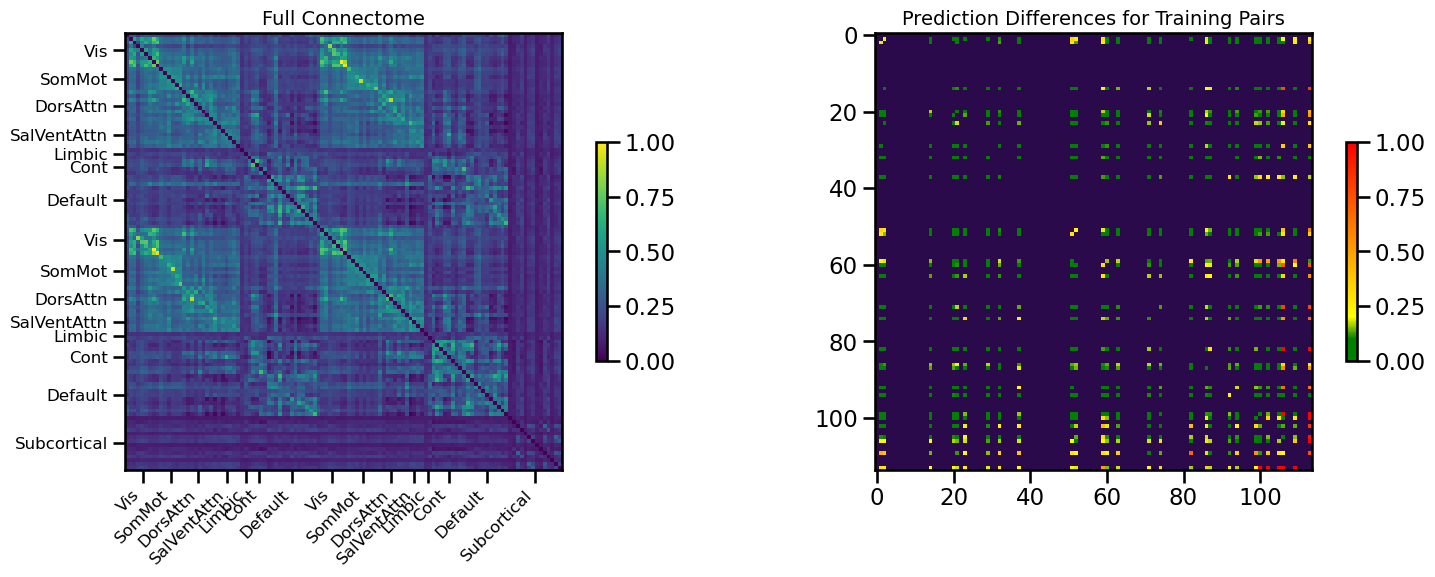

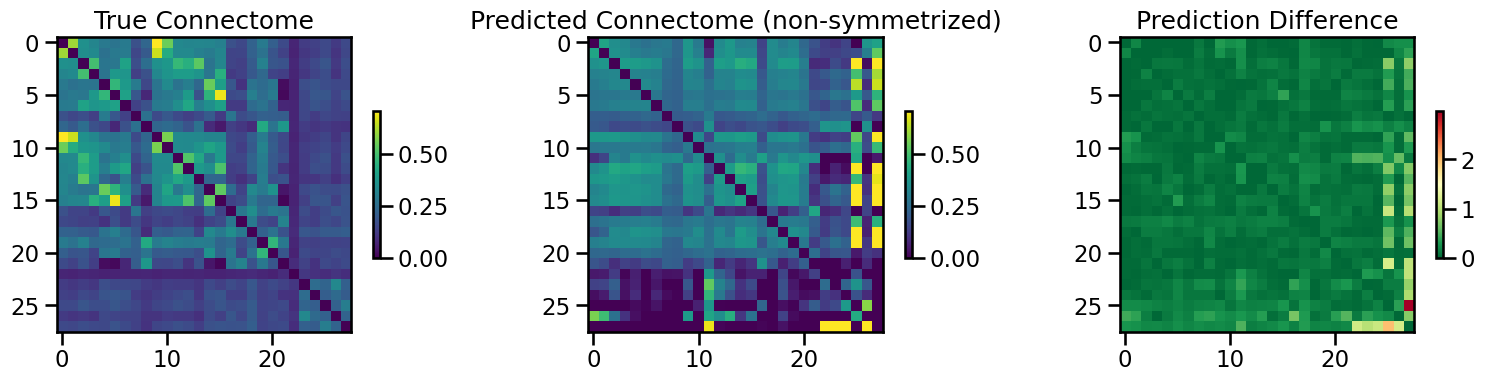

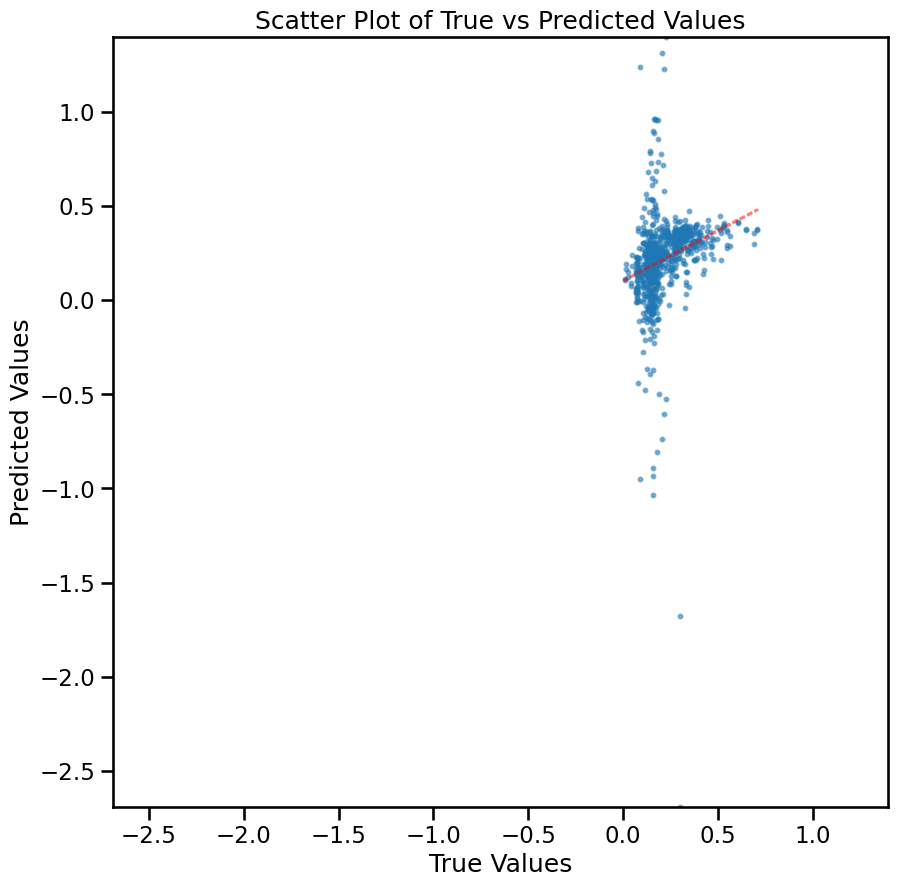


TRAIN METRICS: {'mse': 0.0063118106, 'mae': 0.058328893, 'r2': 0.5719398565828366, 'pearson_corr': 0.7583449151602251, 'geodesic_distance': 7.822471793209364}
TEST METRICS: {'mse': 0.06326872, 'mae': 0.13963586, 'r2': -3.809803020411465, 'pearson_corr': 0.24099690948175126, 'geodesic_distance': 5.074692234184262}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 21520, 'encoder_hidden_dim': 256, 'encoder_output_dim': 16, 'use_bilinear': True, 'deep_hidden_dims': [32], 'dropout_rate': 0.0, 'learning_rate': 0.0001, 'weight_decay': 0.0, 'lambda_reg': 0.0, 'batch_size': 128, 'epochs': 150}
CPU Usage: 12.8%
RAM Usage: 16.6%
Available RAM: 314.3G
Total RAM: 377.1G
| ID | GPU | MEM |
------------------
|  0 |  0% | 12% |


53478

In [70]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='shared_mlp_encoder', 
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=None,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 34
Number of 1s: 3362, Number of 0s: 9634, Class balance (1s): 0.259
Number of 1s: 3220, Number of 0s: 9776, Class balance (1s): 0.248
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X shape (114, 10760)

 Test fold num: 1 X_train shape: (7140, 21520) Y_train shape: (7140,) X_test shape: (812, 21520) Y_test shape: (812,)
2
3
4
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=6, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0, reg_lambda=0, subsample=0.6, tree_method=gpu_hist, verbosity=0;, score=-0.013 total time=  15.7s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=6, n_estimators=250, 

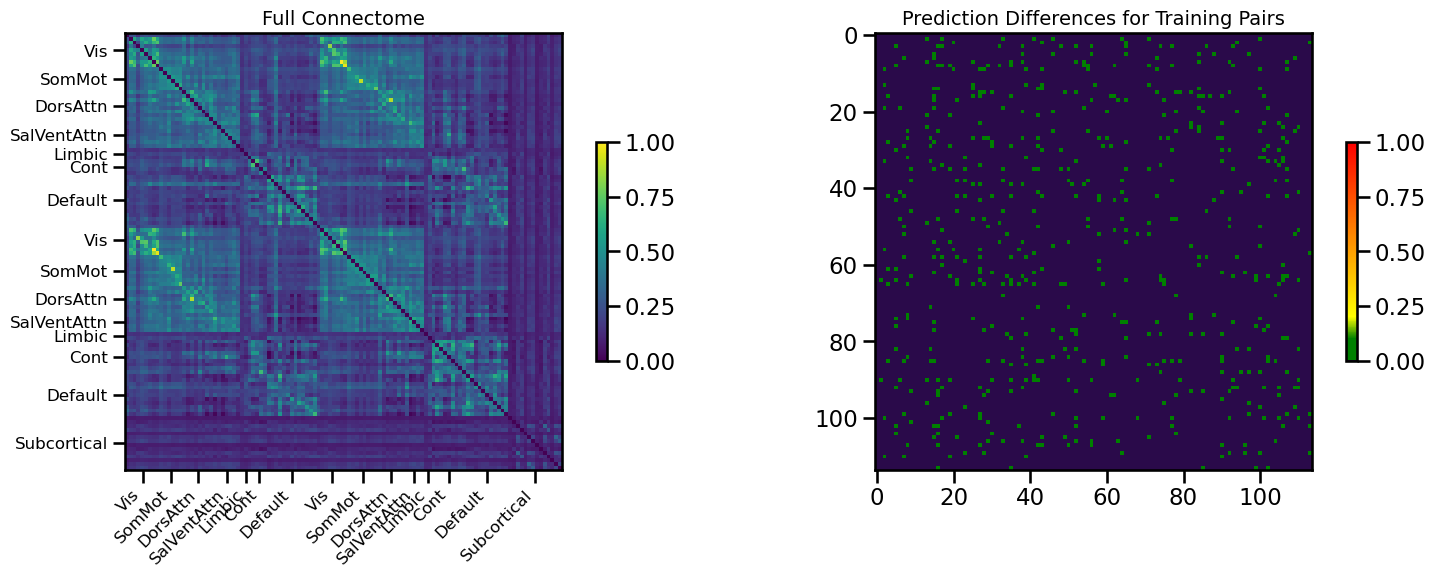

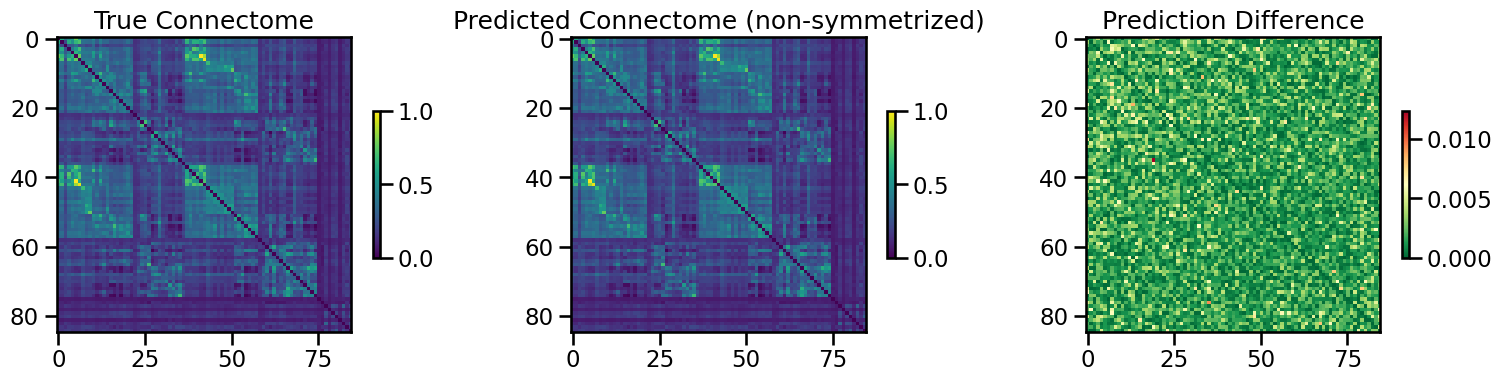

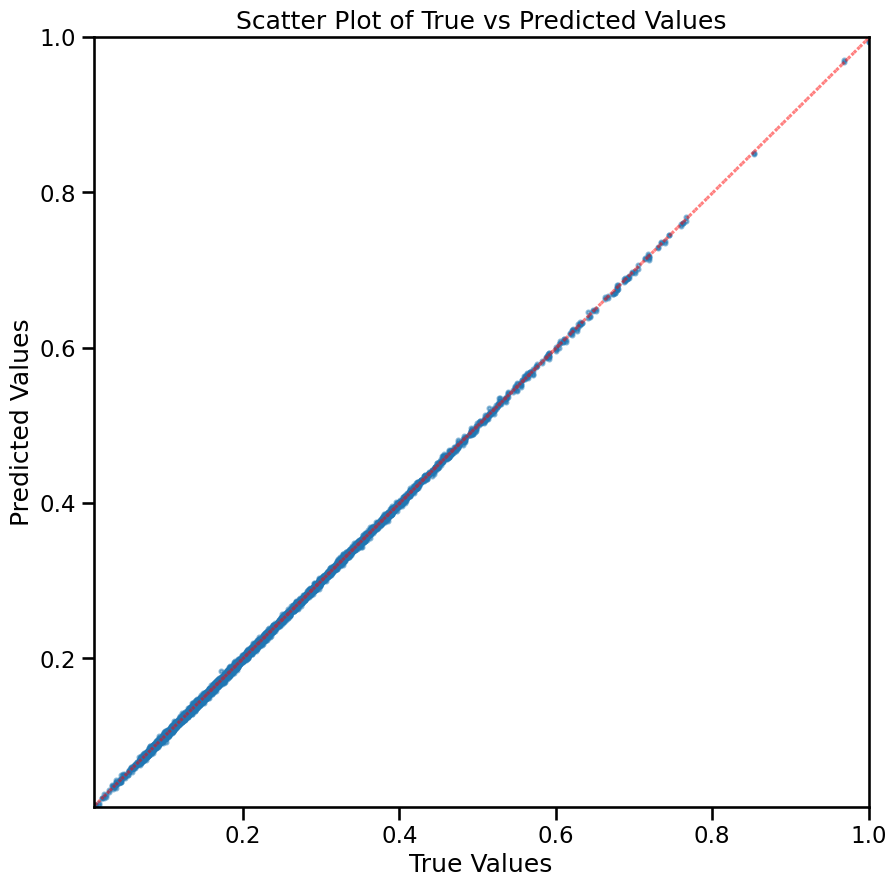

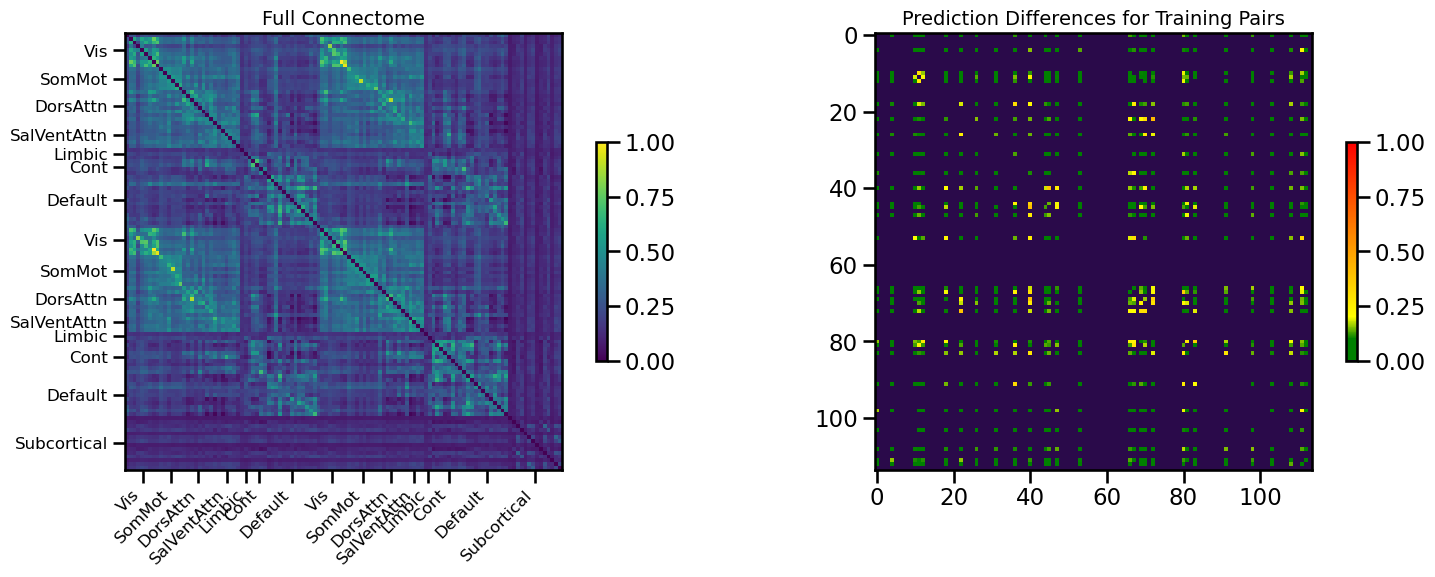

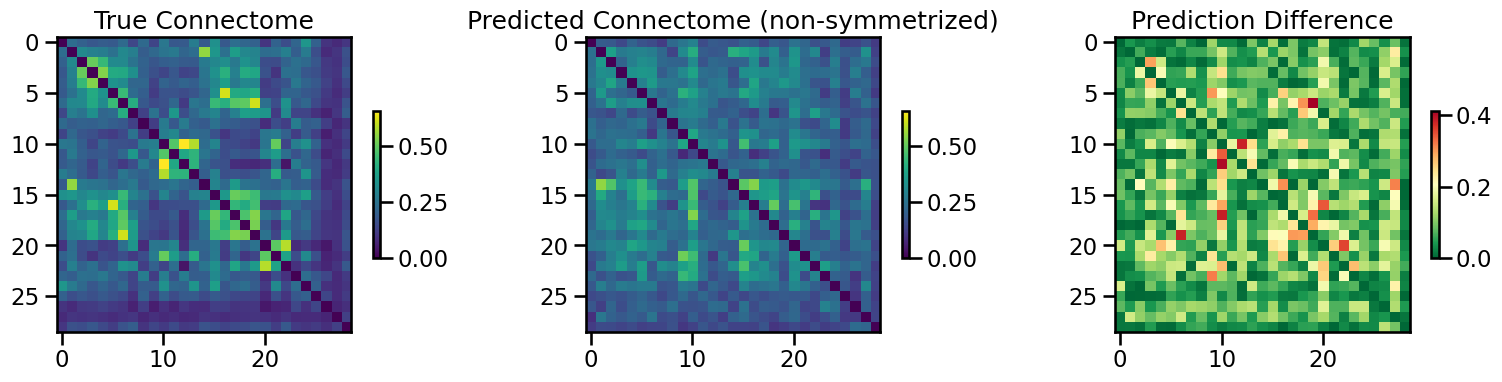

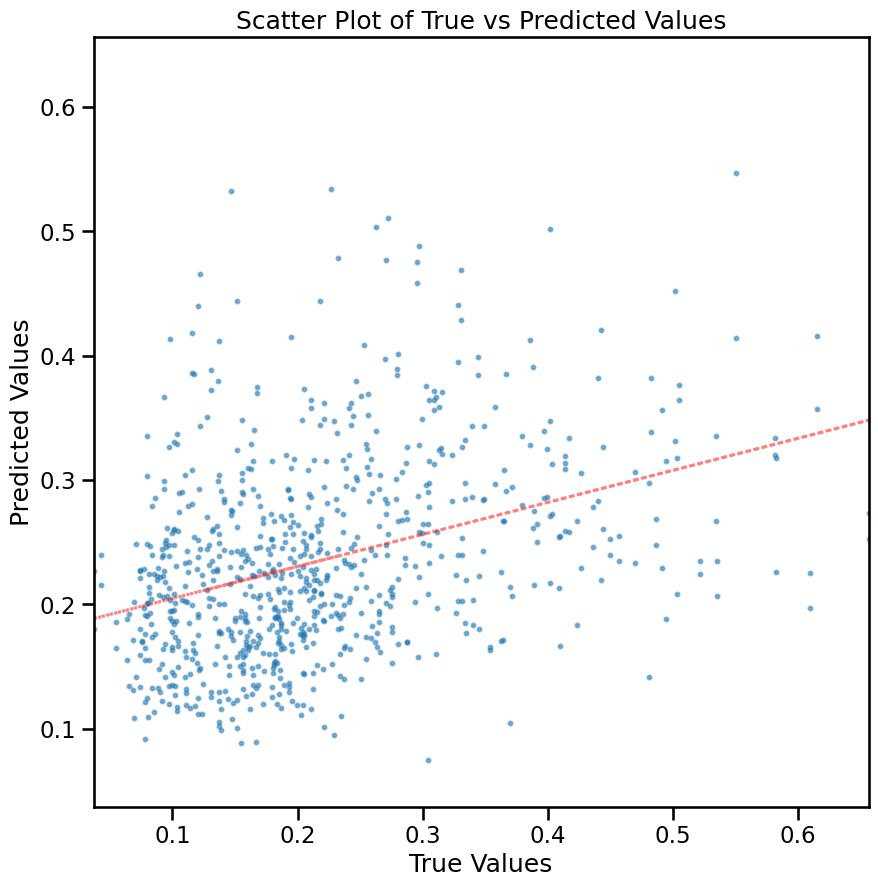


TRAIN METRICS: {'mse': 5.02876158529242e-06, 'mae': 0.0017648939826624675, 'r2': 0.999669619682151, 'pearson_corr': 0.9998360644446556, 'geodesic_distance': 0.7082990842095439}
TEST METRICS: {'mse': 0.012828858495807744, 'mae': 0.0863488304400018, 'r2': -0.01039836658347526, 'pearson_corr': 0.3644406218174343, 'geodesic_distance': 7.895528147014722}
BEST VAL SCORE -0.013428968943709358
BEST MODEL HYPERPARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monoton

53135

In [60]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='xgboost', # WORKS FOR S100 ONLY 
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=None,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100', # too much memory for S400
              gene_list='0.2',
              hemisphere='both',
              search_method=('random', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 34
Number of 1s: 3362, Number of 0s: 9634, Class balance (1s): 0.259
Number of 1s: 3220, Number of 0s: 9776, Class balance (1s): 0.248
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X shape (114, 10760)

 Test fold num: 1 X_train shape: (7140, 21520) Y_train shape: (7140,) X_test shape: (812, 21520) Y_test shape: (812,)
2
3
4
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ......n_components=3, scale=False;, score=-0.011 total time=   1.7s
[CV 3/3] END ......n_components=3, scale=False;, score=-0.013 total time=   1.7s
[CV 2/3] END ......n_components=3, scale=False;, score=-0.012 total time=   1.7s

Parameter Search CV Results:
Best Parameters:  {'n_components': 3, 'scale': False}
Best Cr

  matrix[i, j] = vector[vector_index]



No full or subset visualizations for this model


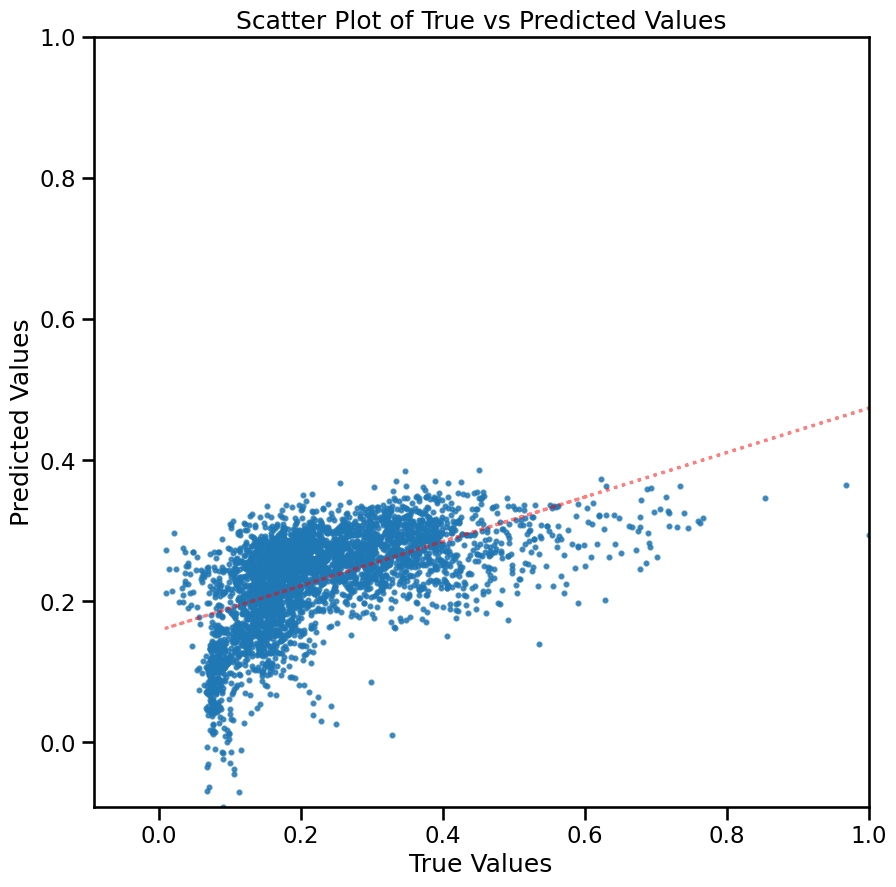

  matrix[i, j] = vector[vector_index]



No full or subset visualizations for this model


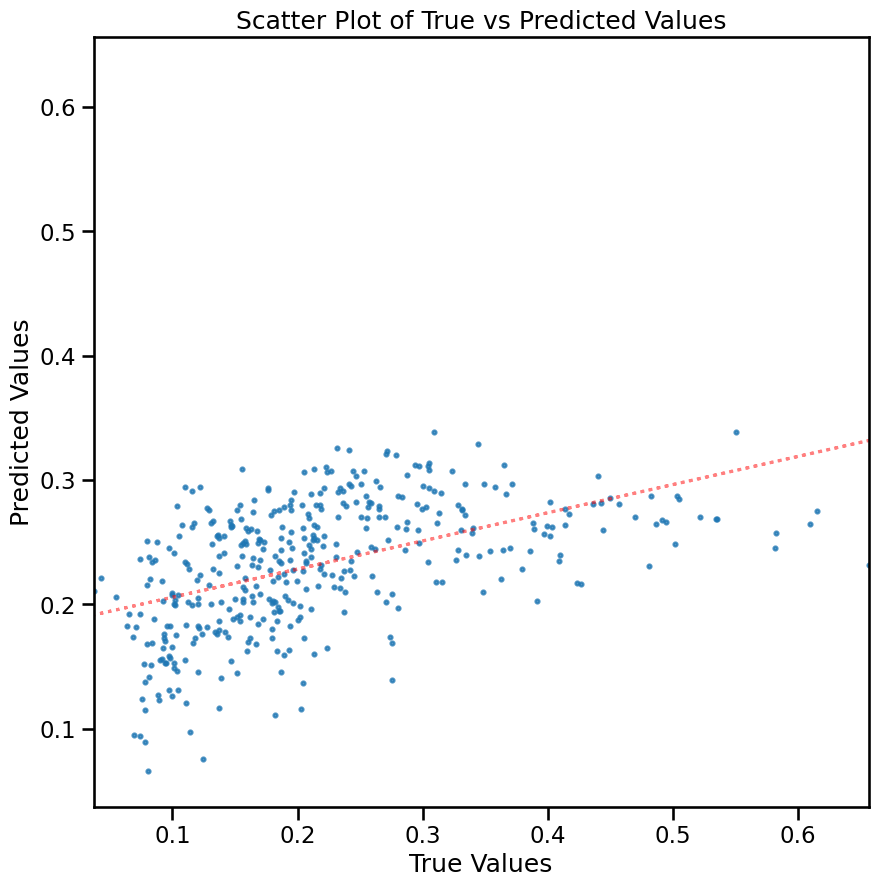


TRAIN METRICS: {'mse': 0.010424336857525864, 'mae': 0.0756303045125371, 'r2': 0.315140384776303, 'pearson_corr': 0.5613736587837936, 'geodesic_distance': 9.971945302019932}
TEST METRICS: {'mse': 0.009826354430591277, 'mae': 0.07664100442114022, 'r2': 0.22607826180449342, 'pearson_corr': 0.49657732426851603, 'geodesic_distance': 7.019208988374967}
BEST VAL SCORE -0.012147639113068945
BEST MODEL HYPERPARAMS {'copy': True, 'max_iter': 500, 'n_components': 3, 'scale': False, 'tol': 1e-06}


12004

In [59]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='pls',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=None,
              use_gpu=False, # automate this at some point
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='both',
              search_method=('random', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()